100%|██████████| 9912422/9912422 [00:00<00:00, 105400658.24it/s]


Extracting mnist_train/MNIST/raw/train-images-idx3-ubyte.gz to mnist_train/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 295452911.77it/s]


Extracting mnist_train/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_train/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 104879989.64it/s]


Extracting mnist_train/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_train/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 601323.47it/s]

Extracting mnist_train/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_train/MNIST/raw



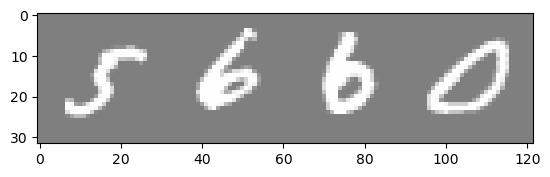

In [1]:
# PyTorchでTensorBoardを利用するためのサンプルコード
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random

# TensorBoardのライターを設定
writer = SummaryWriter('runs/tensorboard_example')

# ランダムな画像データをTensorBoardに記録
# 画像はMNISTデータセットからランダムに選択
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('mnist_train', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

# 画像をTensorBoardに記録
for i in range(100):
    # 画像グリッドを作成
    images, labels = next(iter(trainloader))
    img_grid = torchvision.utils.make_grid(images)

    # 画像データをTensorBoardに記録
    writer.add_image('four_mnist_images', img_grid, global_step=i)
    
    # ランダムな数値データをTensorBoardに記録
    writer.add_scalar('scalar1/value1', random.randint(0, 100), global_step=i)
    writer.add_scalar('scalar1/value2', random.randint(0, 100), global_step=i)

    scalars1 = {"A":random.randint(0, 100), "B":random.randint(0, 100), "C":random.randint(0, 100), "D":random.randint(0, 100)}
    writer.add_scalars('scalar2', scalars1, global_step=i)
    scalars3_1 = {"A":random.randint(0, 100), "B":random.randint(0, 100), "C":random.randint(0, 100), "D":random.randint(0, 100)}
    writer.add_scalars('scalar3/test1', scalars3_1, global_step=i)
    scalars3_2 = {"A":random.randint(0, 100), "B":random.randint(0, 100), "C":random.randint(0, 100), "D":random.randint(0, 100)}
    writer.add_scalars('scalar3/test2', scalars3_2, global_step=i)

writer.close()

# 画像を表示するためのヘルパー関数
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 実際の画像を表示してみる
imshow(img_grid)